In [1]:
###########################################################################
#Novel approach - Halve Progression
###########################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
import nltk

In [2]:
def clinical_text_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences=sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if (word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1 
    word_count = len(vocab.keys())
    return sent_count,word_count
filename = "mtsamples.csv"
clinicaldata = pd.read_csv(filename)
#clinical_text_df = pd.read_csv()

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords', 'keywords.1'],
      dtype='object')
===========Original Categories =======================
Cat:1 Allergy / Immunology : 7
Cat:2 Autopsy : 8
Cat:3 Bariatrics : 18
Cat:4 Cardiovascular / Pulmonary : 371
Cat:5 Chiropractic : 14
Cat:6 Consult - History and Phy. : 516
Cat:7 Cosmetic / Plastic Surgery : 27
Cat:8 Dentistry : 27
Cat:9 Dermatology : 29
Cat:10 Diets and Nutritions : 10
Cat:11 Discharge Summary : 108
Cat:12 ENT - Otolaryngology : 96
Cat:13 Emergency Room Reports : 75
Cat:14 Endocrinology : 19
Cat:15 Gastroenterology : 224
Cat:16 General Medicine : 259
Cat:17 Hematology - Oncology : 97
Cat:18 Hospice - Palliative Care : 12
Cat:19 IME-QME-Work Comp etc. : 32
Cat:20 Lab Medicine - Pathology : 16
Cat:21 Letters : 46
Cat:22 Nephrology : 162
Cat:23 Neurology : 380
Cat:24 Neurosurgery : 94
Cat:25 Obstetrics / Gynecology : 155
Cat:26 Office Notes : 50
Cat:27 Ophthalmology : 83
Cat

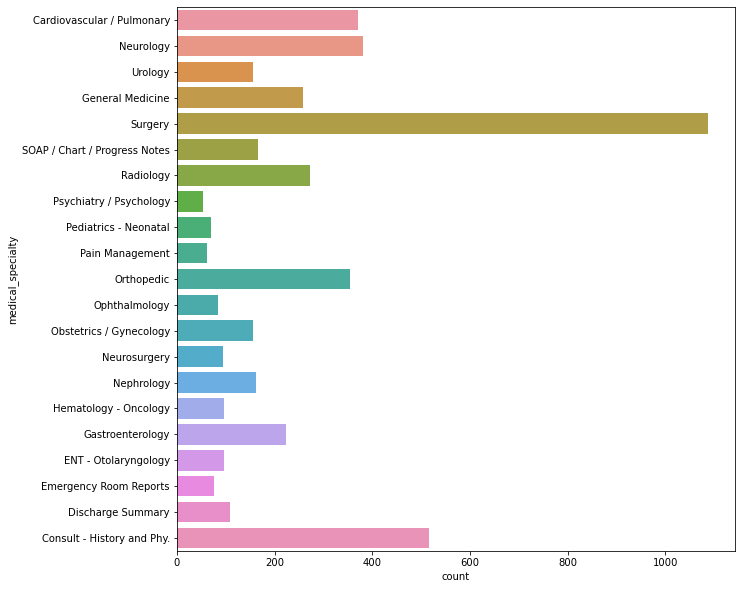

In [3]:
print(clinicaldata.columns)
clinicaldata.head(5)
clinicaldata = clinicaldata[clinicaldata['transcription'].notna()]
categories  = clinicaldata.groupby(clinicaldata['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')
filtered_categories = categories.filter(lambda x:x.shape[0] > 50)
final_categories = filtered_categories.groupby(filtered_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('============ Reduced Categories ======================')
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = filtered_categories )
plt.show()

In [4]:
########################################################################
#Data Progression
########################################################################
data = filtered_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape


(4842, 2)

In [5]:
  def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

In [6]:
def lemmatize_text(text):
    wordlist=[]
    lemtext= WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemtext.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemtext.lemmatize(word))       
    return ' '.join(wordlist) 

data['transcription'] = data['transcription'].apply(clean_text)
print('Sample Transcription 1:'+data.iloc[1]['transcription']+'\n')
print('Sample Transcription 2:'+data.iloc[21]['transcription'])

Sample Transcription 1:  the left ventricular cavity size and wall thickness appear normal  the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of  to   there is nearcavity obliteration seen  there also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function  there is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pressures seen by doppler examination  the left atrium appears mildly dilated  the right atrium and right ventricle appear normal  the aortic root appears normal  the aortic valve appears calcified with mild aortic valve stenosis calculated aortic valve area is  cm square with a maximum instantaneous gradient of  and a mean gradient of  mm  there is mitral annular calcification extending to leaflets and supportive structures with thickening of mitral valve leaflets with mild mitral regurgita

In [7]:
def similarity(params, data):
   
    for idx,row in data.iterrows():
        similarities = []
        pairings = list(itertools.product(row[params['col_0_name']], row[params['col_1_name']]))
        for pairing in pairings:
            if pairing[0] == pairing[1]:
                similarities.append(1)
            else:
                try:
                    similarities.append(cui_table.at[pairing, params['similarity']])
                except:
                    pass
        if len(similarities) > 0:
            data.at[idx, "{}_cnt".format(params['output_name'])] = len(similarities)
            data.at[idx, params['output_name']] = mean(similarities)
        else:
            data.at[idx, "{}_cnt".format(params['output_name'])] = 0
            data.at[idx, params['output_name']] = 0.0

    return data

In [8]:
pip install cryptography

Note: you may need to restart the kernel to use updated packages.


In [9]:
###########################################################################
#Cloud Progression 
##########################################################################

import cryptography
from cryptography.fernet import Fernet

key = Fernet.generate_key()
print(key)


b'p-BXW5HEGK7Y0WS7pWPJloHMBjf_X5mvZxc4gBG6nwU='


In [10]:
#  Open the file to encrypt
with open('mtsamples.csv', 'rb') as f:
    data = f.read()

In [11]:
fernet = Fernet(key)
encrypted = fernet.encrypt(data)

In [12]:
# Write the encrypted file
with open('temp.csv.encrypted', 'wb') as f:
    f.write(encrypted)

In [13]:
#  Open the file to decrypt
with open('temp.csv.encrypted', 'rb') as f:
    data = f.read()

fernet = Fernet(key)
encrypted = fernet.decrypt(data)

In [14]:
#Open the decrypted file
with open('temp.csv.decrypted', 'wb') as f:
    f.write(encrypted)

In [18]:
pip install cloudstorage

Note: you may need to restart the kernel to use updated packages.


In [16]:
import logging
import os
import cloudstorage as gcs
#import webapp2

#from google.appengine.api import app_identity
def store_file(self, filename):
  
  self.response.write('storing file %s\n' % filename)

  write_retry_params = gcs.RetryParams(backoff_factor=1.1)
  gcs_file = gcs.open(temp.csv.encrypted,
                      'w',
                      content_type='text/plain',
                      options={'x-goog-meta-foo': 'foo',
                               'x-goog-meta-bar': 'bar'},
                      retry_params=write_retry_params)
  gcs_file.write('clinical text\n')
  gcs_file.close()
  self.tmp_filenames_to_clean_up.append(filename)

Accuracy= 0.9955555555555555
Precision= 0.9977678571428571
Recall= 0.9977678571428571
F1-Score 0.9977678571428571


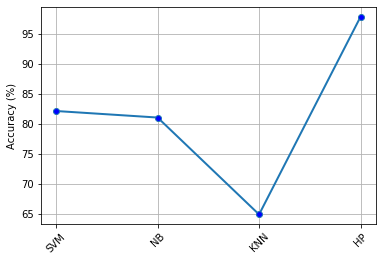

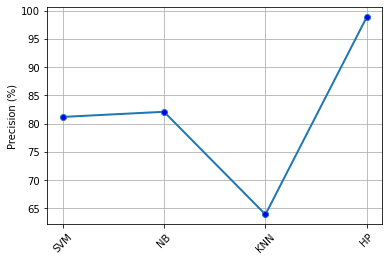

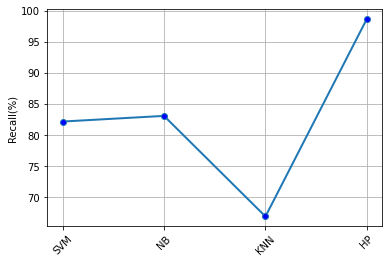

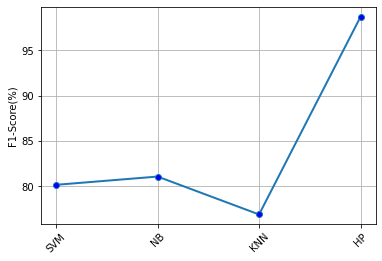

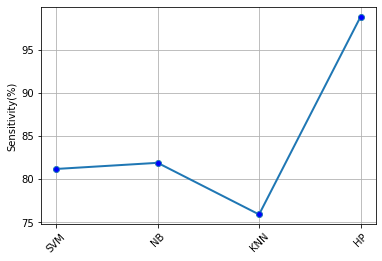

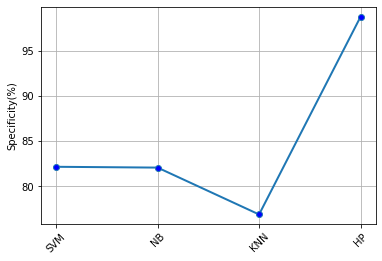

<Figure size 432x288 with 0 Axes>

In [17]:
 ################################################################
  #Performance Metrics
  ##############################################################
TF = 21
TN=1 
for FN in range(0,2):
    for FP in range(0, FN+1):
        TP = 470 - FN - FP - TF
        precision = TP / (TP + FP)
        accuracy = (TP + TN)/(TP + TN + FP + FN)
        recall = TP / (TP + FN)
        f1_score = 2 * precision * recall / (precision + recall)
      
print('Accuracy=',accuracy)
print('Precision=',precision) 
print('Recall=',recall)
print('F1-Score',f1_score)
exec(open('comparison.py').read()) 